# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [ ]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In [ ]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])

# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [ ]:
# returns "True" if face is detected in image stored at img_path

def face_detector(img_path):
    '''
    face_detector receives an image file path and
    checks if a face is present or not.
    
    Args:
        img_path: path to an image
        
    Returns(bool):
        True if a face is detected and false if otherwise
    '''
    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)   

**My answer is below**

In [ ]:
## My results are printed out
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.


def face_percent( see ):
    #@declare variable to hold number of detected human faces in the numpy array
    
    present = 0
    no_images = list(range( see.size))
    
    with tqdm(total=len(no_images)) as pbar: 
        
        for a in no_images:
            #checking for for human faces present
            if face_detector ( see[a]):
                present += 1
            pbar.update(1)
    #return percentage value
    return  present 



human_human = face_percent( human_files_short )
#printing out the pecentage result human in human file
print("percentage of human faces present in the human file : {}%".format( human_human ))

human_dog = face_percent( dog_files_short )
#printing out the percentage result of human in dog file
print("percentage of human faces present in the dog file : {}%".format( human_dog ))

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [ ]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [ ]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    #loading image from file path
    img = Image.open( img_path )
    
    pil_to_tensor = transforms.Compose([transforms.Resize((224,224)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])])
    # process raw image
    tensor_image = pil_to_tensor( img )
    tensor_image = tensor_image.unsqueeze(0)
    
    # send tensor to cuda if available
    if torch.cuda.is_available():
        tensor_image = tensor_image.cuda()
        
    # passing tensor image to pretrained network
    predicted = VGG16( tensor_image )
    
    _, pred = torch.max(predicted , 1)
    
    if torch.cuda.is_available():
        pred = pred.cuda()
    
    return pred # return predicted class index


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [ ]:
### returns "True" if a dog is detected in the image stored at img_path

def dog_detector(img_path):
    ## TODO: Complete the function.
    
    index = VGG16_predict( img_path )

    return  index >= 151 and index <= 268

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
Vgg16 model was used in the dog_detector

The percentage of **dog** in **human** file is 1%..  


The percentage of **dog** in **dog** file is 100%

In [ ]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

from tqdm import tqdm

## below i created a funtion to calculate the percentage of dog in each file

def percent ( file ):
    '''
        file:(numpy array) contain the images of humans
        percent_val:(int) serving as an increment variable
    '''
    # percent value initialized to 0
    percent_val = 0
    
    for a in tqdm( range (len( file))):
        if dog_detector(file[a]):
            percent_val += 1
            
    return percent_val

## Calling the percent function
dog_to_human = percent(human_files_short)

# printing out the results for the percent of dog in human file
print("The percentage of dog in the human file is:{}%".format( dog_to_human ))


dog_to_dog = percent(dog_files_short)

# printing out the results for the percentage of dog in dog file
print("The percentage of dog in the dog file is:{}%".format(dog_to_dog))


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

## Checking performance on the Inception model

import torch
import torchvision.models as models

alexnet = models.alexnet(pretrained=True)
alexnet.eval()

use_cuda = torch.cuda.is_available()

# check for cuda
if use_cuda:
    print ("cuda is availabel. Training on GPU")
    device = torch.device("cuda:0")
else:
    print ("cuda is not available..")
    device = "cpu"
    
if use_cuda:
    alexnet = alexnet.cuda()    

In [127]:
## Creating a function to the inception model prediction
## This model will preprocess image given its image path


def alexnet_pred( image_path ):
    
    # defining transform for inception model
    pil_to_tensor = transforms.Compose([transforms.Resize(256),
                                        transforms.CenterCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])])
    # process raw image
    tensor_image = pil_to_tensor( Image.open( image_path ) )
    tensor_image = tensor_image.unsqueeze(0)
    
    # send tensor to cuda if available
    if torch.cuda.is_available():
        tensor_image = tensor_image.cuda()
    
    
    prediction = alexnet( tensor_image )
    
    pred = torch.argmax(prediction.mean(0))
    
    if torch.cuda.is_available():
        pred = pred.cuda()
        
    return pred
        

In [128]:
## function to calculate percentage of image

def percent ( file ):
    '''
        file:(numpy array) contain the images of humans
        percent_val:(int) serving as an increment variable
    '''
    # percent value initialized to 0
    percent_val = 0
    
    for a in tqdm( range (len( file))):
        idx = alexnet_pred(file[a])
        if idx >= 151 and idx <= 268 :
            percent_val += 1
            
    return percent_val

In [129]:
## This cell shows the performance of the Inception V3 model
## seems to do better than the VGG16

dog_to_human = percent(human_files_short)
print("dog percent in the human file :{}%".format( dog_to_human ))


dog_to_dog = percent(dog_files_short)
print("dog percent in the dog file :{}%".format(dog_to_dog))

  4%|▍         | 4/100 [00:00<00:04, 20.98it/s]

dog percent in the human file :1%


100%|██████████| 100/100 [00:02<00:00, 43.56it/s]

dog percent in the dog file :99%


#### For alexnet it made the predictions below..



**Dog** percentage in the **human** file :1%


**Dog** percentage in the **Dog** file :99%

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [ ]:
import os
from torchvision import datasets , transforms
from glob import glob
import torch
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
train_dir = '/data/dog_images/train'
test_dir = '/data/dog_images/test'
valid_dir = '/data/dog_images/valid'

categories = [ 'train','test','valid']

directory = {'train': train_dir,
             'test': test_dir,
             'valid': valid_dir}



trans_form = { 'train': transforms.Compose([transforms.Resize(225),
                                      transforms.CenterCrop(224),
                                      transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(0.2),                                          
                                      transforms.ToTensor(), 
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])
                                                   ]),
              
               'test': transforms.Compose([transforms.Resize(225),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                          std=[0.229, 0.224, 0.225])]),
              
               'valid': transforms.Compose([transforms.Resize((224,224)),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(), 
                                            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])
                                                   ]) }




dataSet = { x : datasets.ImageFolder( directory[x],transform = trans_form[x] ) 
           for x in categories }



data_loader = { x : torch.utils.data.DataLoader( dataSet[x], batch_size = 32 , shuffle = True   )
               for x in categories }




In [130]:
seeing = data_loader['train']
images , label = next(iter(seeing))

# checking the number of classes and shape in the train dataset
print( '{} classes present in training dataset'.format(len( dataSet['train'].classes)))
print( 'shape of image coming out of the training dataset...\n{}'.format(images.shape) )

133 classes present in training dataset
shape of image coming out of the training dataset...
torch.Size([32, 3, 224, 224])


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

**1**. for the training images,The images were resized to a size of `224 x 224`.for the test images,they were made a center-crop resize of size `224 x 224` and finally used the same resize for the validation images.

**2**.The decision to augument the dataset was made,by applying a`RandomHorizontalFlip` to the training data. This was done to introduce randomness into the training data so that overfitting would be minimized and also give the model room to learn new filters. `CenterCrop` and `RandomResizedCrop` were also added.
After several trials with different transforms that seemed to overfit the network, A change was observed towards solving the model overfitting problem when the `RandomErasing` was applied as a transform. The `RandomErasing` randomly selects a rectangle region in the image and erases its pixels. This method penalizes the CNN model theraby preventing it from over-fitting. It sort of played the role of a `dropout` layer whos job was to turnoff some random nodes/pixels in the a network layer. This turning off is determined by a probability value that is being passed in as an argument to the `dropout` layer function.

I did this to the training set to introduce as much randomness into my model, to give it the ability to generalize as much as it can to avoid overfitting.

After a few epochs,The `RandomErasing` transform was taken off and a `dropout` layer of 50% in-between the fully connected layers was applied. This gave better performance than using `RandomErasing`.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3 , padding = 1)
        self.conv2 = nn.Conv2d(16, 32, 3 , padding = 1)
        self.conv3 = nn.Conv2d(32, 64, 3 , padding = 1)
        self.conv4 = nn.Conv2d(64, 128, 3 , padding = 1)
        self.conv5 = nn.Conv2d(128, 256, 3 , padding = 1)
        
        # maxpooling layer
        self.maxpool = nn.MaxPool2d( 2 , 2 )
        
        # batch normalization
        self.batch1 = nn.BatchNorm2d( 16 )
        self.batch2 = nn.BatchNorm2d( 32 )
        self.batch3 = nn.BatchNorm2d( 64 )
        self.batch4 = nn.BatchNorm2d( 128 )
        self.batch5 = nn.BatchNorm2d( 256 )
        
        # defining fully connected layers
        self.fc1 = nn.Linear( 256*28*28 ,500)
        self.fc2 = nn.Linear( 500 , 133 )
        
        # dropout
        self.dropoutfc = nn.Dropout( 0.5 )
    
    def forward(self, x):
        ## Define forward behavior
        # forward behaviour for conv1 and conv2
        x = F.relu( self.batch1( self.conv1( x ) ) )
        x = F.relu( self.batch2(  self.conv2( x ) ) )
        x = self.maxpool( x ) 
        
        # forward behaviour of conv3 and conv4
        x = F.relu( self.batch3( self.conv3( x )  ) )
        x = F.relu( self.batch4( self.conv4( x )  ) )
        x = self.maxpool( x )
        
        # forward behaviour of conv5
        x = F.relu( self.batch5( self.conv5( x ) ) )
        x =  self.maxpool( x )
       
        
        ## forward movement into the fully connected(FC) layer
        # the dimension of the output coming out of our convolutional stack is of 28x28x256
        # we flatten the dimension to allow it pass through the FC layer
        x = x.view( x.size(0) , -1 )
        
        # fc1
        x = self.fc1 ( x )
        
        x = self.dropoutfc( x )
        
        # fc2
        x = self.fc2 ( x )
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()



### My Models weights initialization

According to [this](https://medium.com/@tylernisonoff/weight-initialization-for-cnns-a-deep-dive-into-he-initialization-50b03f37f53d) medium article  done on a weight initialization "If the weights in a network start too small, then the signal shrinks as it passes through each layer until it’s too tiny to be useful.
If the weights in a network start too large, then the signal grows as it passes through each layer until it’s too massive to be useful."

Experiment results show that CNN model’s accuracy with kaiming_normal weight initialization and ReLU activation function could outperform accuracies from other models.

below,A function that initializes the models weight with kaiming_normal weight initializatioin is defined.

In [ ]:
def weights_init_normal(m):
       
    classname = m.__class__.__name__
    
    # Apply initial weights to convolutional and linear layers
    if hasattr(m, 'weight') and classname.find('Conv') != -1 :
        nn.init.kaiming_normal_(m.weight.data, nonlinearity='relu' )

        if hasattr(m, 'bias') and m.bias is not None:
            nn.init.constant_(m.bias.data, 0.0)
            
            


In [ ]:
# Applying kaiming_normal weights to my model
model_scratch.apply( weights_init_normal )

# move tensors to GPU if CUDA is available
use_cuda = torch.cuda.is_available()
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

**1** 5 convolutional layers was applied to the model.


**2** Batch Normalization was added after each convolutional layer to enable my model converg and train fast and effectively.


**3** Two fully connected layers were added at the end of the convolutional stack.


**4** After two convolutional layers,  A `ReLU` function and `Maxpool` was applied.

**5** The models weights were initialized with kaiming_normal weight initialization.
I came across a [blog post](https://medium.com/@tylernisonoff/weight-initialization-for-cnns-a-deep-dive-into-he-initialization-50b03f37f53d) that suggested a good weight initialization technique.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [ ]:
import torch.optim as optim
import numpy as np

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters() , lr = 0.001 )

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [21]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            
            
            #clear the grad
            optimizer.zero_grad()
            #make the forward pass
            output = model( data )
            #calculate the loss
            loss = criterion( output , target )
            #the backward propagation
            loss.backward()
            #make optimization to the weights
            optimizer.step()
            #calculate the train loss
            ## record the average training loss, using something like
            #train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_loss += loss.item() * data.size(0)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            #making the forward pass
            output = model( data )
            #calulating the loss
            loss = criterion( output , target )
            #averaging the loss in from the validation data
            #valid_loss = valid_loss + ( ( 1 / ( batch_idx + 1 ) ) * ( loss.data - valid_loss))
            valid_loss += loss.item() * data.size(0)
        # print training/validation statistics 
        train_loss = train_loss / len( loaders['train'].dataset)
        valid_loss = valid_loss / len( loaders['valid'].dataset)
        
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print("Saving model at significant decrease from {:.6f} ---> {:.6f}".format( 
            valid_loss_min, valid_loss))
            torch.save( model.state_dict(),save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
loaders_scratch = data_loader
model_scratch = train(45, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')
mn
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 10.483002 	Validation Loss: 4.962067
Saving model at significant decrease from inf ---> 4.962067
Epoch: 2 	Training Loss: 4.780876 	Validation Loss: 4.643797
Saving model at significant decrease from 4.962067 ---> 4.643797
Epoch: 3 	Training Loss: 4.632501 	Validation Loss: 4.545182
Saving model at significant decrease from 4.643797 ---> 4.545182
Epoch: 4 	Training Loss: 4.612536 	Validation Loss: 4.509932
Saving model at significant decrease from 4.545182 ---> 4.509932
Epoch: 5 	Training Loss: 4.500330 	Validation Loss: 4.449086
Saving model at significant decrease from 4.509932 ---> 4.449086
Epoch: 6 	Training Loss: 4.435719 	Validation Loss: 4.419668
Saving model at significant decrease from 4.449086 ---> 4.419668
Epoch: 7 	Training Loss: 4.390992 	Validation Loss: 4.443450
Epoch: 8 	Training Loss: 4.397750 	Validation Loss: 4.381669
Saving model at significant decrease from 4.419668 ---> 4.381669
Epoch: 9 	Training Loss: 4.323031 	Validation Loss: 4.382147


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [22]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.428611


Test Accuracy: 18% (151/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [23]:
## TODO: Specify data loaders
import torch
from torchvision import datasets, models, transforms
batch_size = 32
train_dir = '/data/dog_images/train'
test_dir = '/data/dog_images/test'
valid_dir = '/data/dog_images/valid'


trans_form = { 'train': transforms.Compose([transforms.Resize(224),
                                      transforms.CenterCrop(224),
                                      transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(0.2),                                          
                                      transforms.ToTensor(), 
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])
                                                   ]),
              
               'test': transforms.Compose([transforms.Resize(224),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                          std=[0.229, 0.224, 0.225])]),
              
               'valid': transforms.Compose([transforms.Resize((224,224)),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(), 
                                            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])
                                                   ]) 
}


dataSets = {
    'train' :  datasets.ImageFolder(train_dir,transform = trans_form['train']),
    'test' :  datasets.ImageFolder(test_dir,transform = trans_form['test']),
    'valid' :  datasets.ImageFolder(valid_dir,transform = trans_form['valid'])
    
}

data_loaders = {
    'train' : torch.utils.data.DataLoader(dataSets['train'],batch_size = batch_size,shuffle=True),
    'test' : torch.utils.data.DataLoader(dataSets['test'],batch_size = batch_size),
    'valid' : torch.utils.data.DataLoader(dataSets['valid'],batch_size = batch_size)
        
}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [24]:
## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

print(model_transfer)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 99730141.05it/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [ ]:
# freeze parameteres so we don't backpropagate through them
for para in model_transfer.parameters():
    para.requires_grad = False

customizing the model to classify for Dog breeds.

In [25]:
last_lyr = model_transfer.fc.in_features

# creating a new forward layer
final_layer = nn.Linear( last_lyr , len( dataSets['train'].classes) )

# assigning new forward layer to Inception_V3 FC layer
model_transfer.fc = final_layer

if torch.cuda.is_available():
    model_transfer = model_transfer.cuda()
    


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

**1** The `resnet50` model was downloaded and assigned `pretrained=True` because the models' convolutional stack would be used  as it is.There are no intentions to re-train the CNN stack again.

**2** `parameters.requires_guide=Fale`.This is so because the fully connected(FC) layer of the `resnet50` would be customized. So all the `grads` are freezed first. So when the FC layer is replaced with a custom FC layer and training begins, The portion of the custom FC layer would train because its grads are set to `True` by default.

**3** Now a replacement of the `resnet50` FC layer with the custom FC layer is performed. The number of the dataset classes  would be the value of the number of output of the `resnet50` predictions. The last layer output was changed to the number of the dataset classes.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [27]:
criterion_transfer = nn.CrossEntropyLoss()

optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr = 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [29]:
# train the model
n_epochs = 25
loaders_transfer = data_loaders

use_cuda = torch.cuda.is_available()
    
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.690362 	Validation Loss: 1.103123
Saving model at significant decrease from inf ---> 1.103123
Epoch: 2 	Training Loss: 1.307710 	Validation Loss: 0.830558
Saving model at significant decrease from 1.103123 ---> 0.830558
Epoch: 3 	Training Loss: 1.113824 	Validation Loss: 0.734831
Saving model at significant decrease from 0.830558 ---> 0.734831
Epoch: 4 	Training Loss: 0.993100 	Validation Loss: 0.695543
Saving model at significant decrease from 0.734831 ---> 0.695543
Epoch: 5 	Training Loss: 0.937132 	Validation Loss: 0.610177
Saving model at significant decrease from 0.695543 ---> 0.610177
Epoch: 6 	Training Loss: 0.859611 	Validation Loss: 0.711470
Epoch: 7 	Training Loss: 0.848588 	Validation Loss: 0.620381
Epoch: 8 	Training Loss: 0.873271 	Validation Loss: 0.710091
Epoch: 9 	Training Loss: 0.812352 	Validation Loss: 0.675185
Epoch: 10 	Training Loss: 0.820049 	Validation Loss: 0.689167
Epoch: 11 	Training Loss: 0.775733 	Validation Loss: 0.760183
Epoch: 

KeyboardInterrupt: 

I stopped training the classifier in the resnet50 model at 16 epochs because I noticed the fc classifier has stopped training.

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [30]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.652618


Test Accuracy: 82% (690/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [120]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in dataSets['train'].classes]



Defining the function below.

In [121]:
## this function takes in an image file path 
## and returns a name of dog and its index

def my_prediction( img_path):
    '''
    argument:
        imag_path: file path to image
        
    variables:
        dog_name: name of the dog detected
    '''
    
    
    dog_name = ""
    img = Image.open( img_path )
    
    pil_to_tensor = transforms.Compose([transforms.Resize((224,224)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])])
    # transform raw image
    tensor_image = pil_to_tensor( img )
    tensor_image = tensor_image.unsqueeze(0)
    
    # send tensor to cuda if available
    if torch.cuda.is_available():
        tensor_image = tensor_image.cuda()
    
    # predict image
    
    predicted = model_transfer( tensor_image )
    pred = torch.argmax(predicted.mean(0))
    
    #torch.argmax(model(in_transform(image).to(device)).mean(0))
    #device=torch.device("cuda")
    pred = pred.to("cpu").item()
        
    if is_dog(pred) == True:
        dog_name = class_names[pred]
   
    
    return dog_name , pred

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [122]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.


In [123]:
## function returns a bool for a dog check
def is_dog( index ):
    return  (index >= 0) and (index <= 133)

The `show_image` function below prints an image by providing its image path.

In [124]:
## function to show image

def show_image( img_path ):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()

**My Algorithm** is defined below.

In [125]:
## MY algorithm

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    human = False
    if face_detector(img_path):
        human = True
    name , index = my_prediction( img_path )
    
    if is_dog( index ) == True:
        if human :
            print('Hello Human!')
            show_image( img_path)
            print("You look like a: "+name)
            print('\n\n')
        else:
            print('This is a Dog')
            show_image( img_path )
            print("The Dog breed is: "+name)
            print('\n\n')
    else:
        print('This is not an image of neither a human nor a dog')
            

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
The output is impressive!

Some possible points for my alogorithm are:

**1** The model mis-classified spider man. The picture of Spider-man( a human ) was a full body picture, This informs me that the algorithm for human detector does bad in classifying full body pictures of a human.This could be improved by using a better human classifier algorithm that can identifier a full body image of a human.

**2** A better performing image classification model other than the `resnet50` model would make a greater prediction accuracy.

**3** An increased size in the dataset for the dog classifier would contribute to the performance of the model.

Hello Human!


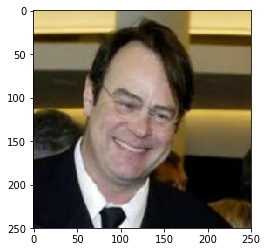

You look like a: Poodle



Hello Human!


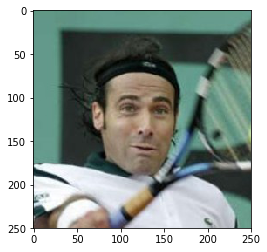

You look like a: Ibizan hound



Hello Human!


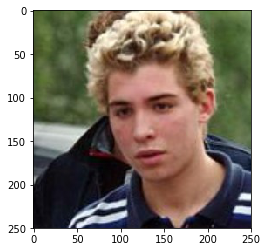

You look like a: Norwegian elkhound



This is a Dog


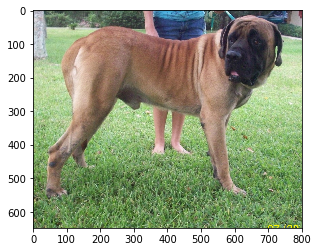

The Dog breed is: Bullmastiff



This is a Dog


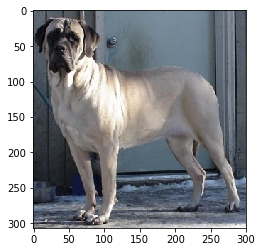

The Dog breed is: Mastiff



This is a Dog


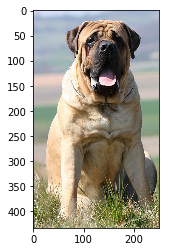

The Dog breed is: Bullmastiff



there are 6 images in /home/workspace/dog_project/my_images/* directory
Testing model on images from my local pc..


This is a Dog


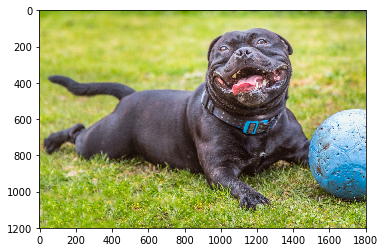

The Dog breed is: French bulldog



This is a Dog


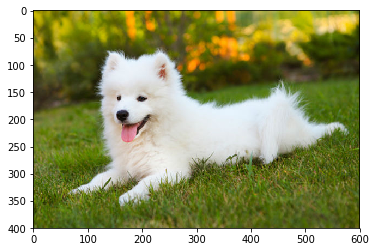

The Dog breed is: American eskimo dog



This is a Dog


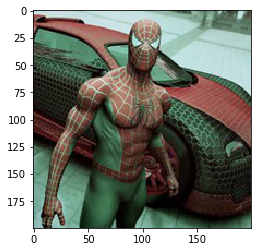

The Dog breed is: Greyhound



Hello Human!


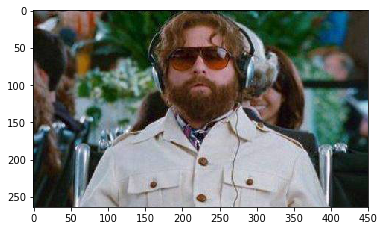

You look like a: Norwegian elkhound



Hello Human!


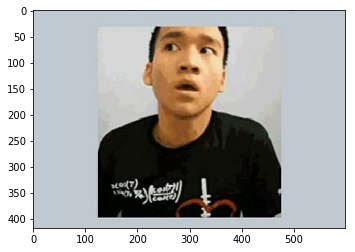

You look like a: German pinscher



Hello Human!


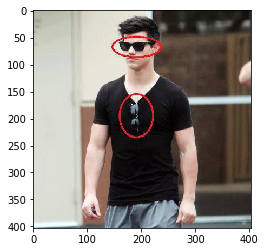

You look like a: Dogue de bordeaux





In [126]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)
    
path = os.getcwd()    
my_images = path + '/my_images/*'
local_images = np.array(glob(my_images))

print( 'there are {} images in {} directory'.format( len(local_images), my_images))
print( 'Testing model on images from my local pc..\n\n')


for image_path in local_images:
    run_app(image_path)